In [1]:
import os
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

import openpyxl

In [2]:
output_path = os.path.join('C:\\','projects','pg_risk_analysis_output','output')
risk_path = os.path.join(output_path,'risk')
figure_path = os.path.join('C:\\','projects','pg_risk_analysis_output','output','figures')

# TC risk change ratio

        Country  climate_model  change_ratio
0        Brunei  CMCC-CM2-VHR4     -7.943249
1         China  CMCC-CM2-VHR4     28.119271
2     Indonesia  CMCC-CM2-VHR4     47.580476
3         Japan  CMCC-CM2-VHR4     33.305480
4      Cambodia  CMCC-CM2-VHR4     36.182413
..          ...            ...           ...
65  Philippines         Median     11.947480
66  North Korea         Median     53.745756
67     Thailand         Median     10.900036
68       Taiwan         Median     25.841996
69      Vietnam         Median    151.159043

[70 rows x 3 columns]


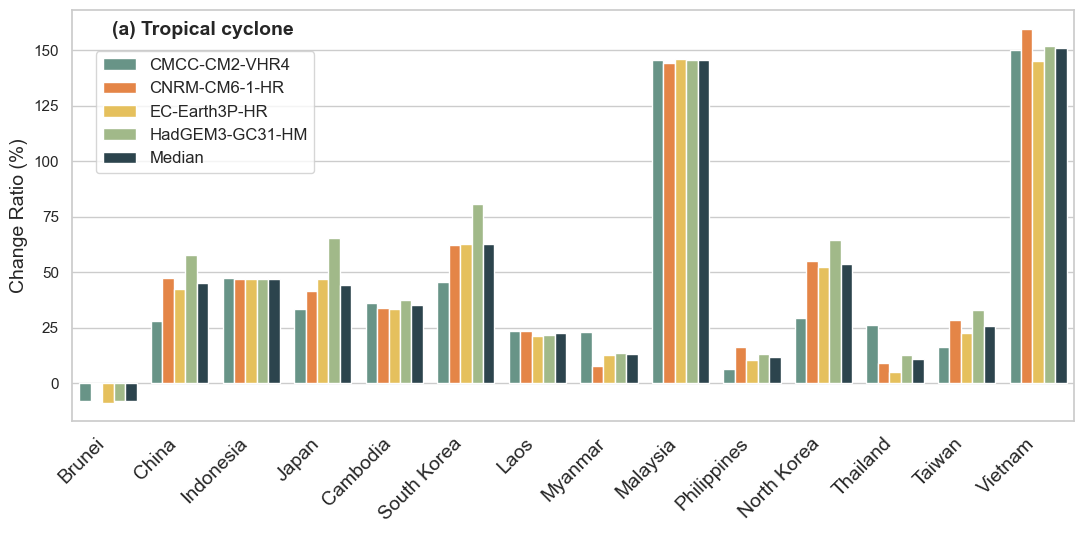

In [3]:
df = pd.read_excel(os.path.join(figure_path,'Table 2_TC&FL country risk.xlsx'))
df = df[df['Country'] != 'Singapore']

# TC change ratio
for i in range(2, 7):
    column_name = df.columns[i]
    df[f"{column_name}_rate"] = ((df[column_name] - df["Present"]) / df["Present"]) * 100

df = df.drop(df.columns[1:9], axis=1)

df_reframed = df.melt(id_vars=["Country"], var_name="climate_model", value_name="change_ratio")

df_reframed['climate_model'] = df_reframed['climate_model'].replace('CMCC-CM2-VHR4_rate', 'CMCC-CM2-VHR4')
df_reframed['climate_model'] = df_reframed['climate_model'].replace('CNRM-CM6-1-HR_rate', 'CNRM-CM6-1-HR')
df_reframed['climate_model'] = df_reframed['climate_model'].replace('EC-Earth3P-HR_rate', 'EC-Earth3P-HR')
df_reframed['climate_model'] = df_reframed['climate_model'].replace('HadGEM3-GC31-HM_rate', 'HadGEM3-GC31-HM')
df_reframed['climate_model'] = df_reframed['climate_model'].replace('Median risk of climate models_rate', 'Median')
print(df_reframed)

# Create bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(11, 5.5))  # Set the figure size

my_pal1 = {"CMCC-CM2-VHR4": "#8CB369", "CNRM-CM6-1-HR": "#F4E285", 
           "EC-Earth3P-HR": "#F4A259", "HadGEM3-GC31-HM": "#5B8E7D", "Median": "#BC4B51"}
my_pal3 = {"CMCC-CM2-VHR4": "#619B8A", "CNRM-CM6-1-HR": "#FE7F2D", 
           "EC-Earth3P-HR": "#FCCA46", "HadGEM3-GC31-HM": "#A1C181", "Median": "#264653"}

ax = sns.barplot(data=df_reframed, x="Country", y="change_ratio", hue="climate_model",palette=my_pal3)

legend_position = (0.25, 0.92)
plt.legend(bbox_to_anchor=legend_position,fontsize=12)
#ax.legend(title="Climate Model", loc='upper left')

plt.xlabel("")  # Remove the x-axis label
plt.ylabel("Change Ratio (%)",fontsize=14)

plt.xticks(rotation=45, ha='right',fontsize=14)
plt.text(0.04, 0.94, "(a) Tropical cyclone", ha='left', fontsize=14, fontweight='bold',transform=ax.transAxes)

# Display the plot
plt.tight_layout()  # To prevent overlapping of labels

plt.savefig(os.path.join(figure_path,'Figure 5-a TC change ratio.jpg'),dpi=450)

plt.show()

# Flood risk change ratio

        Country  change_ratio
0        Brunei           NaN
1         China      1.699724
2     Indonesia      4.444240
3         Japan     -4.501834
4      Cambodia           NaN
5   South Korea     -0.093237
6          Laos           NaN
7       Myanmar     56.448293
8      Malaysia     -2.666426
9   Philippines     18.729150
10  North Korea     36.110998
11    Singapore           NaN
12     Thailand     -7.139897
13       Taiwan      8.190013
14      Vietnam     17.079488


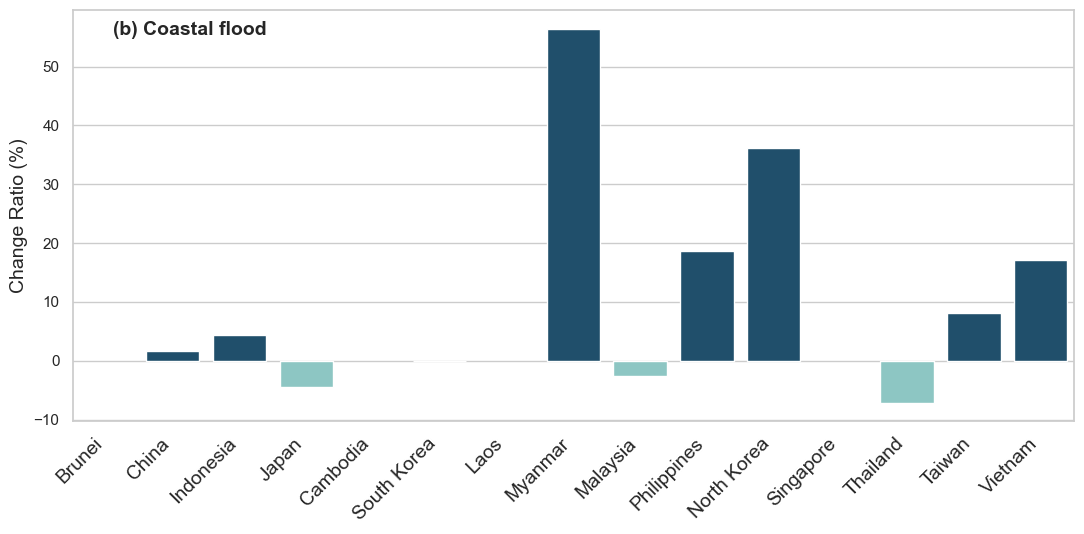

In [4]:
df = pd.read_excel(os.path.join(figure_path,'Table 2_TC&FL country risk.xlsx'))

# flood change ratio
df["change_ratio"] = ((df["RCP8.5"] - df["Historical"]) / df["Historical"]) * 100

#df = df[df['Country'] != 'Brunei','Cambodia','Laos','Singapore']
df = df.drop(df.columns[1:9], axis=1)

print(df)

# Create bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(11, 5.5))  # Set the figure size

my_pal = ["#145277" if ratio > 0 else "#83d0cb" for ratio in df["change_ratio"]]

ax = sns.barplot(data=df, x="Country", y="change_ratio", palette=my_pal)

plt.xlabel("")  # Remove the x-axis label
plt.ylabel("Change Ratio (%)",fontsize=14)

plt.xticks(rotation=45, ha='right',fontsize=14)
plt.text(0.04, 0.94, "(b) Coastal flood", ha='left', fontsize=14, fontweight='bold',transform=ax.transAxes)

# Display the plot
plt.tight_layout()  # To prevent overlapping of labels

plt.savefig(os.path.join(figure_path,'Figure 5-b Flood change ratio.jpg'),dpi=450)

plt.show()

# TC & Flood

        Country  climate_model  change_ratio
0        Brunei  CMCC-CM2-VHR4     -7.943249
1         China  CMCC-CM2-VHR4     28.119271
2     Indonesia  CMCC-CM2-VHR4     47.580476
3         Japan  CMCC-CM2-VHR4     33.305480
4      Cambodia  CMCC-CM2-VHR4     36.182413
..          ...            ...           ...
79  Philippines          Flood     18.729150
80  North Korea          Flood     36.110998
81     Thailand          Flood     -7.139897
82       Taiwan          Flood      8.190013
83      Vietnam          Flood     17.079488

[84 rows x 3 columns]


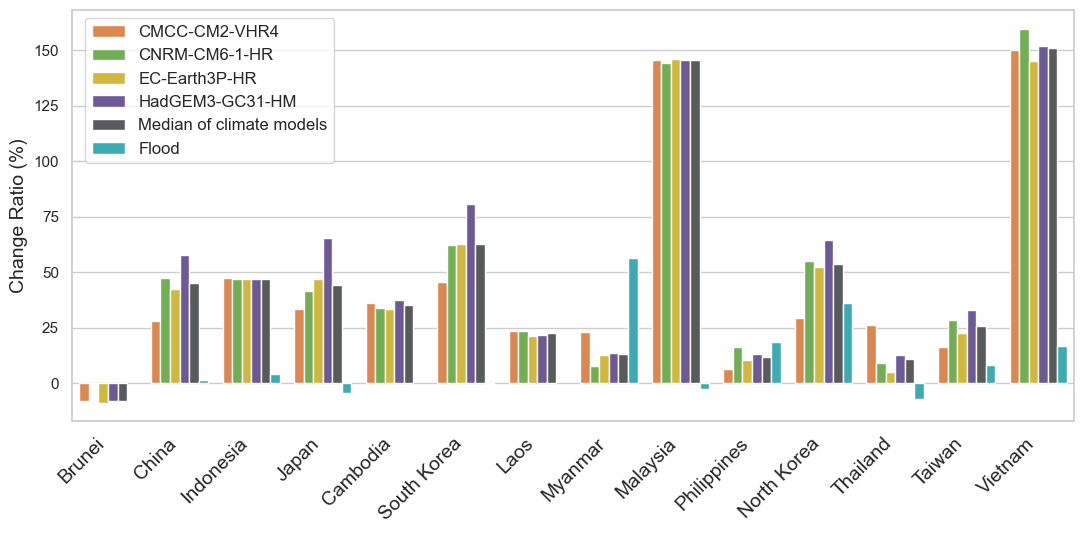

In [13]:
df = pd.read_excel(os.path.join(figure_path,'Table 2_TC&FL country risk.xlsx'))
df = df[df['Country'] != 'Singapore']

# TC change ratio
for i in range(2, 7):
    column_name = df.columns[i]
    df[f"{column_name}_rate"] = ((df[column_name] - df["Present"]) / df["Present"]) * 100

# flood change ratio
df["Flood"] = ((df["RCP8.5"] - df["Historical"]) / df["Historical"]) * 100

df = df.drop(df.columns[1:9], axis=1)

df_reframed = df.melt(id_vars=["Country"], var_name="climate_model", value_name="change_ratio")

df_reframed['climate_model'] = df_reframed['climate_model'].replace('CMCC-CM2-VHR4_rate', 'CMCC-CM2-VHR4')
df_reframed['climate_model'] = df_reframed['climate_model'].replace('CNRM-CM6-1-HR_rate', 'CNRM-CM6-1-HR')
df_reframed['climate_model'] = df_reframed['climate_model'].replace('EC-Earth3P-HR_rate', 'EC-Earth3P-HR')
df_reframed['climate_model'] = df_reframed['climate_model'].replace('HadGEM3-GC31-HM_rate', 'HadGEM3-GC31-HM')
df_reframed['climate_model'] = df_reframed['climate_model'].replace('Median risk of climate models_rate', 'Median of climate models')

print(df_reframed)
# Create bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(11, 5.5))  # Set the figure size

my_pal1 = {"CMCC-CM2-VHR4": "#8ab17d", "CNRM-CM6-1-HR": "#e9c46a", 
           "EC-Earth3P-HR": "#f4a261", "HadGEM3-GC31-HM": "#e76f51", "Median of climate models": "#264653",'Flood':'#2a9d8f'}

my_pal2 = {"CMCC-CM2-VHR4": "#F48239", "CNRM-CM6-1-HR": "#6DBD44", "EC-Earth3P-HR": "#EAC626",
           "HadGEM3-GC31-HM": "#684FA0", "Median of climate models": "#575B5C",'Flood':'#28BEC6',
           "Median risk of climate models": "///" }

ax = sns.barplot(data=df_reframed, x="Country", y="change_ratio", hue="climate_model",palette=my_pal2)
    
legend_position = (0.27, 1)
plt.legend(bbox_to_anchor=legend_position,fontsize=12)
#ax.legend(title="Climate Model", loc='upper left')

plt.xlabel("")  # Remove the x-axis label
plt.ylabel("Change Ratio (%)",fontsize=14)

plt.xticks(rotation=45, ha='right',fontsize=14)

# Display the plot
plt.tight_layout()  # To prevent overlapping of labels

plt.savefig(os.path.join(figure_path,'Figure 5 TC&flood change ratio.jpg'),dpi=450)

plt.show()